In [2]:
import tensorflow as tf
tf.config.list_physical_devices('GPU')

[]

In [16]:
import numpy as np
from ultralytics import YOLO
import os
import cv2
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image
import matplotlib.pyplot as plt

Download annotated data from overflow -- already gave data file 

!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="pPK83gRdEj2jGZHBZBwF")
project = rf.workspace("dmpro").project("traffic-bamtw")
dataset = project.version(1).download("yolov8")

Annotated image visualisation

train/images/000_0002_png.rf.c93cacf4e6fa502a4bc8f2c3cbca196d.jpg


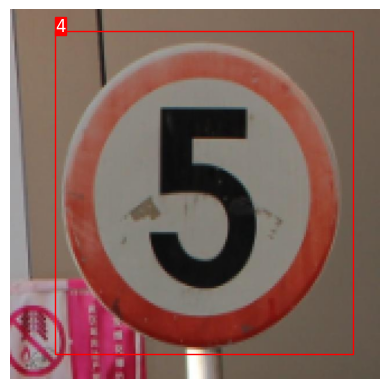

In [13]:
def plot_image_with_bbox(image_path, label_file):
    print(image_path)
    # Read the image
    img = cv2.imread(image_path)
    if img is None:
        print(f"Error: Image not found or cannot be opened: {image_path}")
        return
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # Read the label file
    with open(label_file, 'r') as f:
        lines = f.readlines()

    # Create the plot
    fig, ax = plt.subplots()
    ax.imshow(img)

    # Process each line in the label file
    for line in lines:
        parts = line.strip().split()
        label = int(parts[0])
        x_center, y_center, width, height = map(float, parts[1:])

        # Convert coordinates to xmin, ymin, xmax, ymax format
        img_height, img_width = img.shape[:2]
        xmin = (x_center - width / 2) * img_width
        ymin = (y_center - height / 2) * img_height
        xmax = (x_center + width / 2) * img_width
        ymax = (y_center + height / 2) * img_height

        # Create a rectangle patch and add it to the plot
        rect = patches.Rectangle((xmin, ymin), xmax - xmin, ymax - ymin, linewidth=1, edgecolor='r', facecolor='none')
        ax.add_patch(rect)

        # Add the label text
        ax.text(xmin, ymin, f'{label}', fontsize=12, color='white', bbox=dict(facecolor='red', edgecolor='red', pad=0))

    plt.axis("off")
    plt.show()

# Example usage:
image_path = r"train/images/000_0002_png.rf.c93cacf4e6fa502a4bc8f2c3cbca196d.jpg"
label_file = r"train/labels/000_0002_png.rf.c93cacf4e6fa502a4bc8f2c3cbca196d.txt"
plot_image_with_bbox(image_path, label_file)

In [4]:
# Load the model.
model = YOLO('yolov8n.pt')
 
# Training.
results = model.train(
   data="data.yaml",
   imgsz=456,
   epochs=20,
   batch=8,
   name='yolov8n_v8_10e'
)

New https://pypi.org/project/ultralytics/8.0.84 available  Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.0.82  Python-3.10.9 torch-2.0.0+cpu CPU
yolo\engine\trainer: task=detect, mode=train, model=yolov8n.pt, data=data.yaml, epochs=20, patience=50, batch=8, imgsz=456, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=yolov8n_v8_10e, exist_ok=False, pretrained=False, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=0, resume=False, amp=True, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torch

       8/20         0G      0.687     0.9938      1.094          3        480: 100%|██████████| 52/52 [02:24<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:09<0
                   all         46         45      0.894      0.942      0.976      0.887

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
       9/20         0G     0.6768     0.9524      1.076          2        480: 100%|██████████| 52/52 [02:24<00:00,  2.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:06<0
                   all         46         45      0.958      0.955      0.968      0.882

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
      10/20         0G      0.703     0.9085      1.093          5        480: 100%|██████████| 52/52 [02:19<00:00,  2.
                 Class     Images  Instances      Box(P         

Predict images

In [25]:
!yolo task=detect mode=predict model="runs\detect\yolov8n_v8_10e7\weights\best.pt" source="train/images/000_0013_png.rf.1bdf30fc95a15e4d2c9c962177eb6b4f.jpg"
#yolo task=detect mode=predict model="runs/train/exp/weights/best.pt" source="test.mp4" 

Ultralytics YOLOv8.0.82  Python-3.10.9 torch-2.0.0+cpu CPU
Model summary (fused): 168 layers, 3006623 parameters, 0 gradients, 8.1 GFLOPs

image 1/1 C:\Users\Kartik GSU\Desktop\DM_pro\traffic-1\train\images\000_0013_png.rf.1bdf30fc95a15e4d2c9c962177eb6b4f.jpg: 480x480 1 Speed, 128.0ms
Speed: 0.0ms preprocess, 128.0ms inference, 0.0ms postprocess per image at shape (1, 3, 480, 480)
Results saved to runs\detect\predict


Show predicted image bounding box and labels

In [17]:
def plot_image(img_path):
    img = Image.open(img_path)
    plt.imshow(img)
    plt.axis("off")
    plt.show()

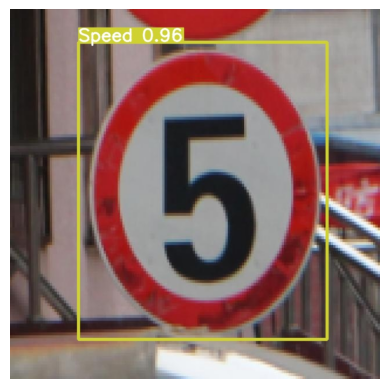

In [18]:
img_path = r"runs/detect/predict/000_0013_png.rf.1bdf30fc95a15e4d2c9c962177eb6b4f.jpg"
plot_image(img_path)